In [33]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

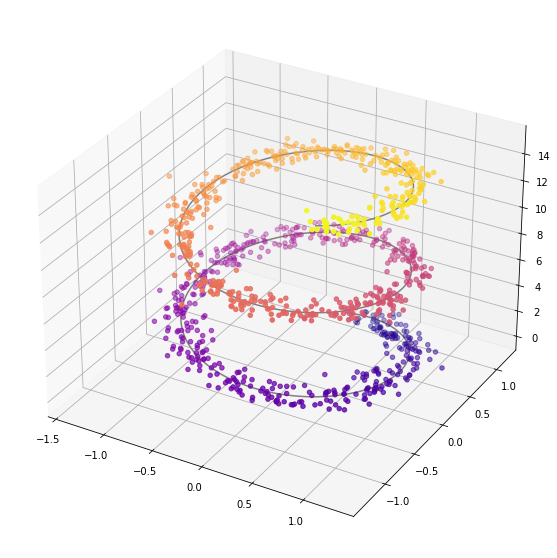

In [2]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(1000)
xdata = np.sin(zdata) + 0.1 * np.random.randn(1000)
ydata = np.cos(zdata) + 0.1 * np.random.randn(1000)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma')


In [6]:
def f1(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)

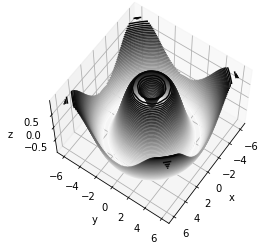

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

In [14]:
Nstep = 1000000
rvec = [np.array([0,0,1])]

for n in range(Nstep):
    rvec.append(rvec[-1] + np.random.randn(3))
rvec=np.array(rvec)
rvec.shape

(1000001, 3)

In [15]:
def f1(x, y):
    return np.sqrt(Nstep - (x ** 2 + y ** 2))

/Users/jeremywelsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


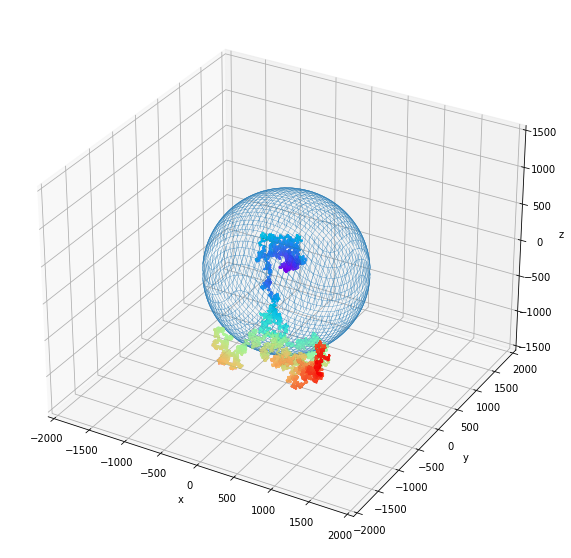

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

xline = rvec[:,0]
yline = rvec[:,1]
zline = rvec[:,2]
rline = np.sqrt( xline**2 + yline**2 + zline**2 )

m = max( [max(np.abs(xline)), max(np.abs(yline))])

x = np.linspace(-m, m, 1000)
y = np.linspace(-m, m, 1000)

X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = -f1(X, Y)

#ax.plot3D(xline, yline, zline, c='k')
ax.scatter3D(xline, yline, zline, c=rline, cmap='rainbow',s=0.001)
ax.plot_wireframe(X, Y, Z1, cmap='binary',linewidth=0.3)
ax.plot_wireframe(X, Y, Z2, cmap='binary',linewidth=0.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-2000,2000)
ax.set_ylim(-2000,2000)
ax.set_zlim(-1500,1500)
plt.show()

In [39]:
rvec.mean(axis=0)

array([ 324.0673695 , -626.57855277, -365.71420519])

In [44]:
@jit(nopython=True)
def autoc(k):
    N = 1000001
    mu = np.array([ 324.0673695 , -626.57855277, -365.71420519])
    var = 1210247.5612073352
    s = [ (rvec[t]-mu).dot((rvec[t+k]-mu)) for t in range(0,N-k)]
    return (1/((N-k)*var))*np.array(s).sum()

In [53]:
ac = []
for k in range(0,int(100000)):
    ac.append(autoc(k))

KeyboardInterrupt: 

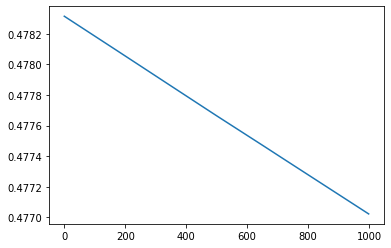

In [52]:
plt.plot(ac)